# Nuages de mots

## Imports et stopwords

In [153]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to C:\Users\CATHY
[nltk_data]     METANGO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem" , "etc" , "mod", "bel" , "ruo", "adr", "ecr", "aveo", "app"
       , "gar","bx","dos", "wai","pet", "dés", "fer"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [155]:
# Choisir une année
year = 1925

In [156]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [157]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [158]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [159]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'12-3 JANVIER 1925. « LE SOI B C J VÉRITABLE REMÈDE DE LA FAMILLE LES Pastilles VALDA SONT INDISPENSABLES à ÎTOANT, au 1ERE, à la MÈRE comme aux GRANDS PARENTS, pour PRÉSERVE** LEURS ORGANES RESPIRATOI'

In [160]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [161]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'12-3 JANVIER 1925. « LE SOI B C J VÉRITABLE REMÈDE DE LA FAMILLE LES Pastilles VALDA SONT INDISPENSABLES à ÎTOANT, au 1ERE, à la MÈRE comme aux GRANDS PARENTS, pour PRÉSERVE** LEURS ORGANES RESPIRATOIRES ou. pour SOIGNER les RHUMES, MAUX de GORGE, LARYNGITES, BRONCHITES, GRIPPE, INFLUENÇA, ASTHME, EMPHYSÈME, «te, MAIS IL FAUT AVOIR BIEN SOIN DS n’empïoyor crue tes Pastilles VALDA véritables vendues seulement en BOITES do 3 Fr. portant le nom VÂIDÂ arrmiriiciiçr iA VENDRE. lhjUe Toiture AviullUvi'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [162]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [163]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1925_clean.txt!'

In [164]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'JANVIER SOI VÉRITABLE REMÈDE FAMILLE PASTILLES VALDA INDISPENSABLES ÎTOANT MÈRE GRANDS PARENTS PRÉSERVE LEURS ORGANES RESPIRATOIRES SOIGNER RHUMES MAUX GORGE LARYNGITES BRONCHITES GRIPPE INFLUENÇA ASTHME EMPHYSÈME SOIN EMPÏOYOR CRUE PASTILLES VALDA VÉRITABLES VENDUES SEULEMENT BOITES PORTANT NOM VÂIDÂ ARRMIRIICIIÇR VENDRE LHJUE TOITURE AVIULLUVIIC UOI ENFANT SUSP COH NEUVE DIPL KRTE DISTINCTION RUE AMÉRICAINE CONSULTATION JVIEUXÜENÎLEFIT PENSION APOQUES MÉDECIN BESOIN TNÉIODE ESTE MIDI BRUX ACHÈ'

## Nuage de mots

### Afficher les termes les plus fréquents


In [165]:
frequencies = Counter(after.split()) #after par before
print(frequencies.most_common(10))

[('RUE', 3763), ('BRUXELLES', 1613), ('PRIX', 1311), ('MAISON', 1067), ('LOUER', 845), ('HEURES', 730), ('TRÈS', 714), ('VENDRE', 709), ('BON', 657), ('GRAND', 656)]


### Créer, stocker et afficher le nuage de mots

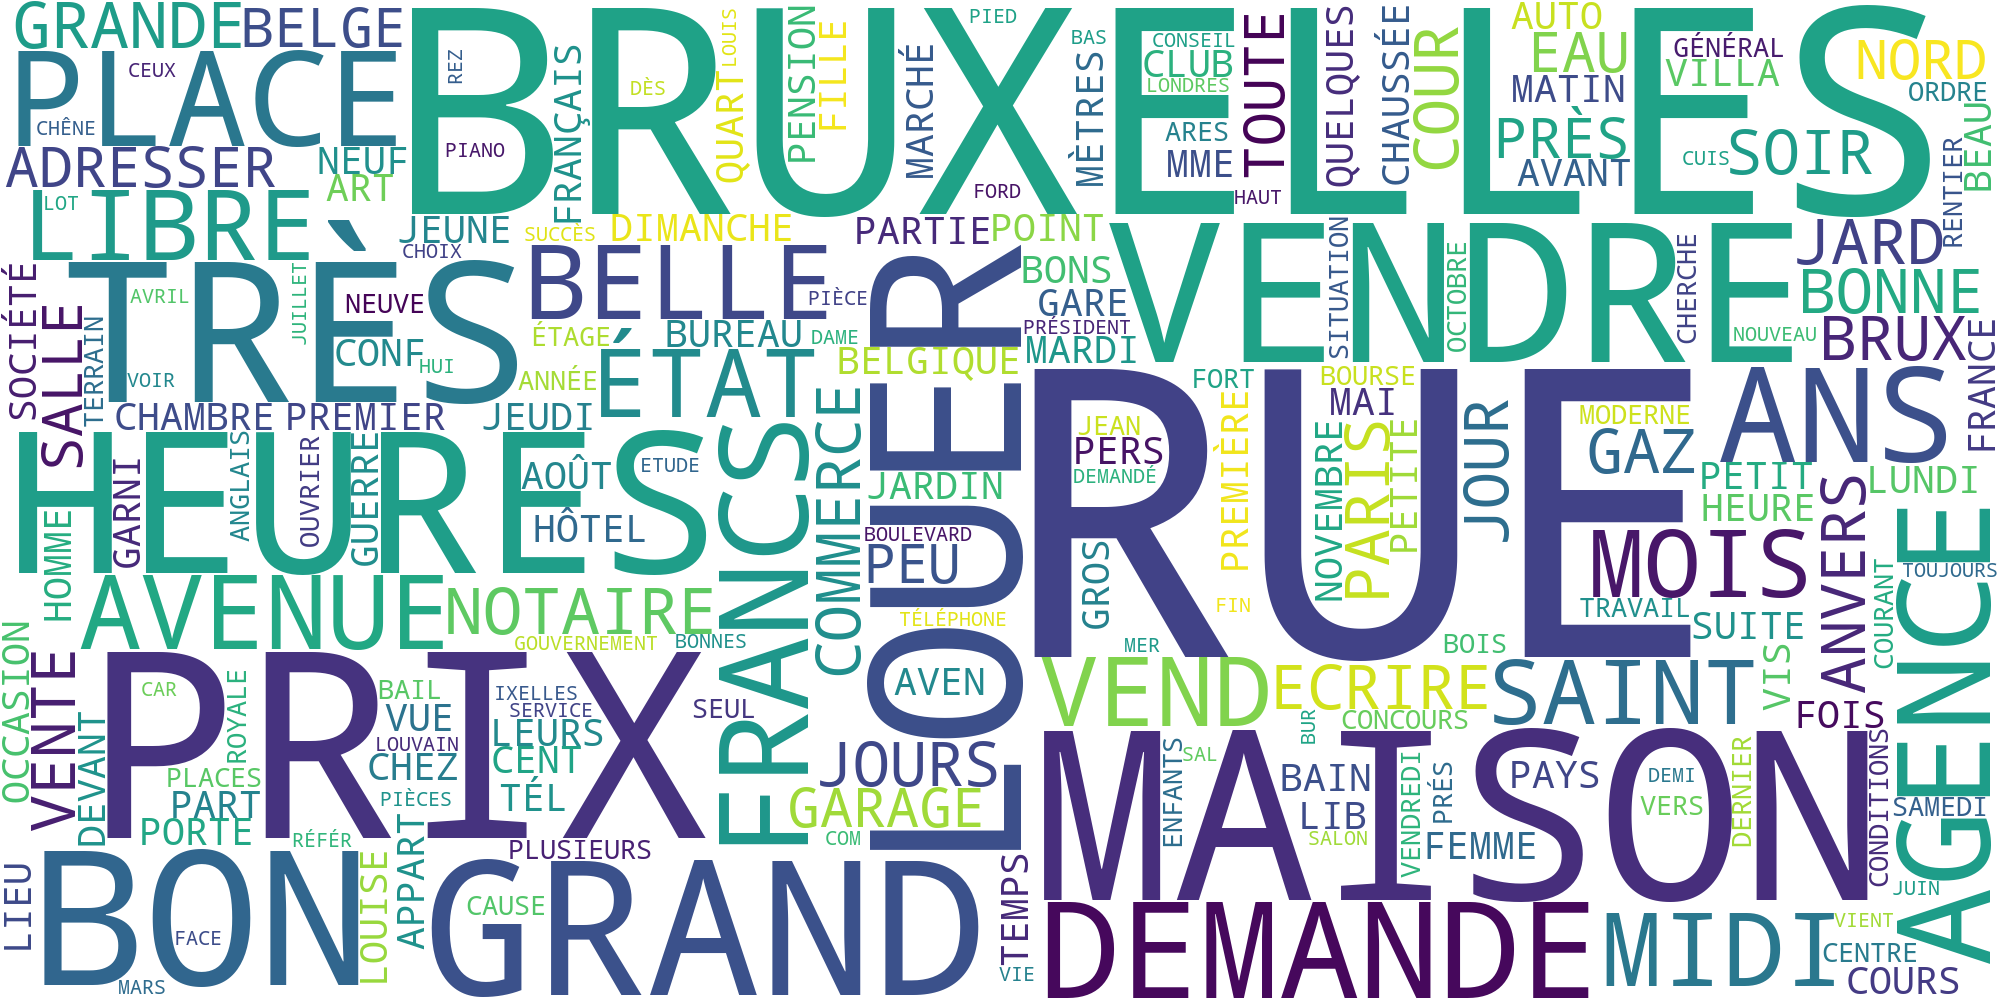

In [166]:
cloud = WordCloud(width=200, height=100, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))